In [6]:
import cv2

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

from PIL import ImageFont
from PIL import Image
from PIL import ImageDraw

In [7]:
font_file = "Courier_New.ttf"

In [8]:
def glyph_to_contours(glyph):
    w = 50
    h = int(w * 1.4)
    font = ImageFont.truetype(font_file, h)
    img = Image.new("RGBA", (w,h), (255,255,255))
    draw = ImageDraw.Draw(img)
    draw.text((0, 0), glyph, (0,0,0), font=font)
    draw = ImageDraw.Draw(img)
    img_arr = np.array(img.getdata()).reshape(img.size[0], img.size[1], 4)
    binary_img = img_arr[:,:,:1] == 255
    binary_img = binary_img.reshape(h,w)
    not_binary = ~binary_img.astype(np.uint8)
    not_binary[not_binary==254] = 0
    cnt_img, contours, hierarchy = cv2.findContours(not_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    del img
    return cnt_img, contours

REFERENCE:97


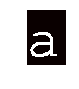

MATCHES:


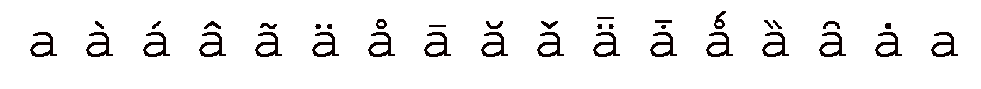

REFERENCE:98


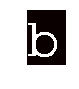

MATCHES:


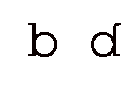

REFERENCE:99


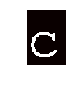

MATCHES:


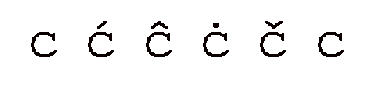

REFERENCE:100


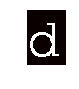

MATCHES:


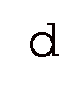

REFERENCE:101


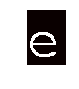

MATCHES:


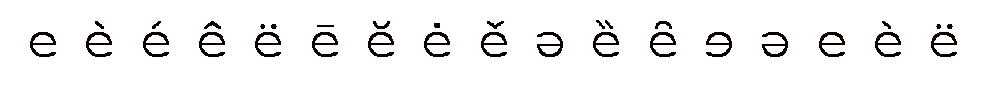

REFERENCE:102


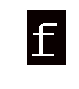

MATCHES:


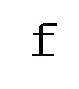

REFERENCE:103


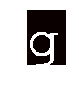

MATCHES:


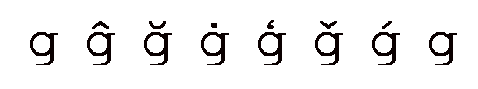

REFERENCE:104


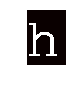

MATCHES:


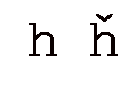

REFERENCE:105


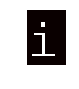

MATCHES:


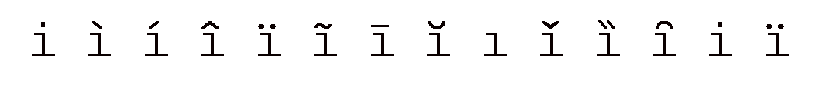

REFERENCE:106


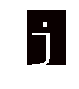

MATCHES:


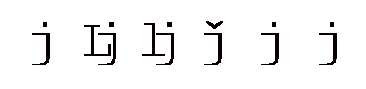

REFERENCE:107


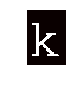

MATCHES:


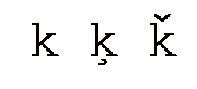

REFERENCE:108


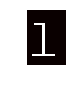

MATCHES:


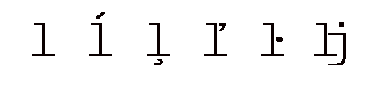

REFERENCE:109


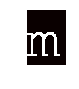

MATCHES:


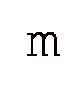

REFERENCE:110


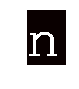

MATCHES:


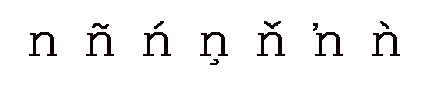

REFERENCE:111


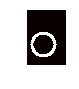

MATCHES:


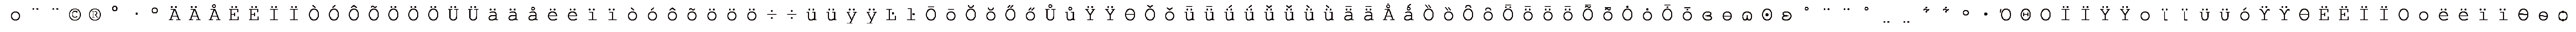

REFERENCE:112


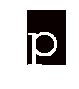

MATCHES:


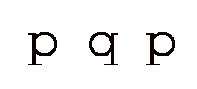

REFERENCE:113


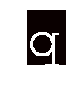

MATCHES:


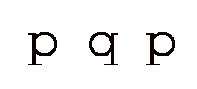

REFERENCE:114


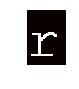

MATCHES:


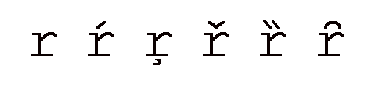

REFERENCE:115


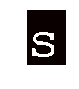

MATCHES:


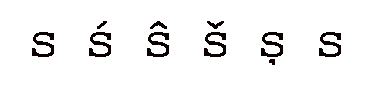

REFERENCE:116


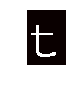

MATCHES:


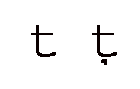

REFERENCE:117


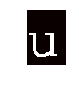

MATCHES:


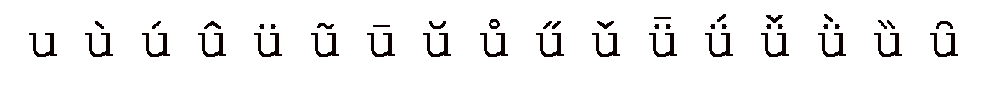

REFERENCE:118


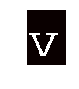

MATCHES:


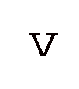

REFERENCE:119


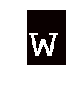

MATCHES:


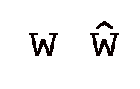

REFERENCE:120


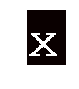

MATCHES:


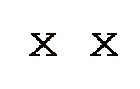

REFERENCE:121


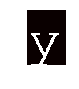

MATCHES:


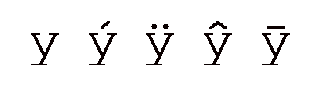

REFERENCE:122


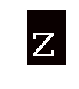

MATCHES:


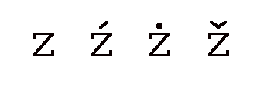

In [9]:
for i in range(97,123):
    refglyph = unichr(i)
    print 'REFERENCE:' + str(i)
    ref_img, ref_contour = glyph_to_contours(refglyph)
    
    fig, ax = plt.subplots(1)
    fig.set_size_inches(1,1)
    ax.axis('off')
    ax.imshow(ref_img, cmap=plt.cm.hot)
    plt.show()

    matches = []
    for j in range(97,1200):
        glyph = unichr(j)
        cnt_img, contours = glyph_to_contours(glyph)
        blank_img = np.zeros((90,50), np.uint8)

        for cnt in contours:
            match_val = cv2.matchShapes(ref_contour[0], cnt, 1, 0.0)
            if match_val < 0.02:
                matches.append(cnt_img)
                
    if len(matches) > 0:
        print "MATCHES:"
        fig, axes = plt.subplots(1, len(matches), squeeze=False)
        fig.set_size_inches(len(matches),1)
        for k in range(len(matches)):
            axes[0,k].imshow(~matches[k], cmap=plt.cm.hot)
            axes[0,k].axis('off')
        plt.show()
    else:
        print 'NO MATCHES'